Ponieranie bibliotek potrzebnych w projekcie (bash)

In [17]:
pip install pandas numpy matplotlib seaborn plotly bokeh statsmodels prophet folium geopandas


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Zebranie danych

In [18]:
import pandas as pd
import numpy as np
import requests

# Pobieranie danych z JHU CSSE
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
data = pd.read_csv(url)

# Czyszczenie danych
data = data.drop(['Lat', 'Long'], axis=1)
data = data.melt(id_vars=['Province/State', 'Country/Region'], var_name='Date', value_name='Cases')
data['Date'] = pd.to_datetime(data['Date'])

# Agregacja danych krajowych
data = data.groupby(['Country/Region', 'Date']).sum().reset_index()

# Wyświetlenie przykładowych danych
print(data.head())


  Country/Region       Date Province/State  Cases
0    Afghanistan 2020-01-22              0      0
1    Afghanistan 2020-01-23              0      0
2    Afghanistan 2020-01-24              0      0
3    Afghanistan 2020-01-25              0      0
4    Afghanistan 2020-01-26              0      0


C:\Users\jasku\AppData\Local\Temp\ipykernel_14168\159684790.py:12: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



Eksploracyjna analiza danych

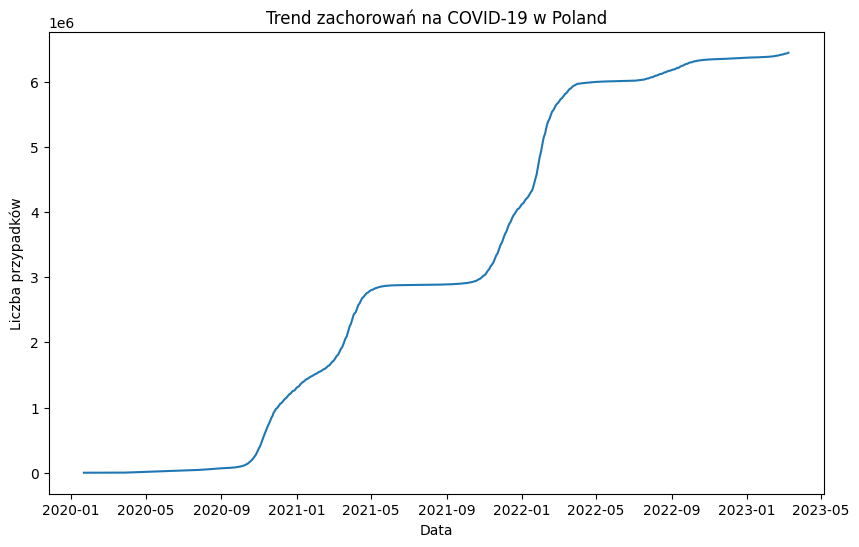

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# Trend zachorowań dla wybranego kraju
country = 'Poland'
country_data = data[data['Country/Region'] == country]

plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Cases', data=country_data)
plt.title(f'Trend zachorowań na COVID-19 w {country}')
plt.xlabel('Data')
plt.ylabel('Liczba przypadków')
plt.show()


Analiza trendów i sezonowości

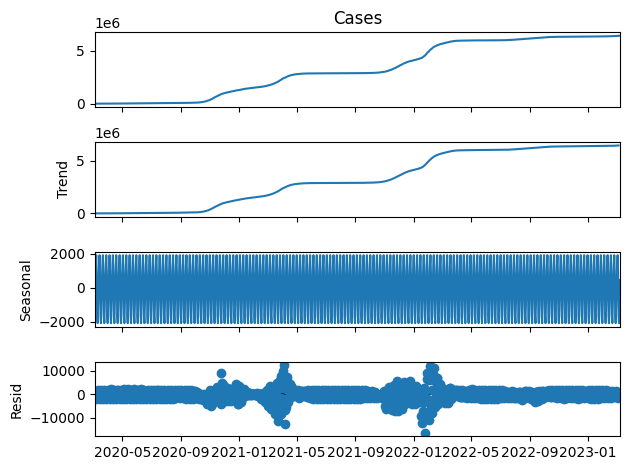

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Analiza trendów i sezonowości
result = seasonal_decompose(filtered_data.set_index('Date')['Cases'], model='additive')


result.plot()
plt.show()


Wizualizacja danych

In [21]:
import plotly.express as px

# Wizualizacja trendu zachorowań dla wybranego kraju
fig = px.line(country_data, x='Date', y='Cases', title=f'Trend zachorowań na COVID-19 w {country}')
fig.show()


Mapa zachorowań

In [31]:
from IPython.display import display
import folium
from folium.plugins import HeatMap
import pandas as pd

# Pobieranie danych z lokalizacją
url_location = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
data_location = pd.read_csv(url_location)

# Przygotowanie danych do mapy
data_location = data_location.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], var_name='Date', value_name='Cases')

# Konwersja kolumny 'Date' na format daty, z określeniem formatu
data_location['Date'] = pd.to_datetime(data_location['Date'], format='%m/%d/%y')

# Agregowanie danych na poziomie kraju
data_location = data_location.groupby(['Country/Region', 'Lat', 'Long', 'Date']).sum().reset_index()

# Przygotowanie mapy
m = folium.Map(location=[0, 0], zoom_start=2)

# Dodanie warstwy heatmap
heat_data = [[row['Lat'], row['Long'], row['Cases']] for index, row in data_location.iterrows()]
HeatMap(heat_data).add_to(m)

# Wyświetlenie mapy w notatniku
display(m)
